In [13]:
import random
import hashlib
from typing import Tuple

In [14]:
PRIME = 23 
GENERATOR = 5  

print(f"\n{'='*80}")
print("PUBLIC PARAMETERS (Known to everyone)")
print(f"{'='*80}")
print(f"Prime (p): {PRIME}")
print(f"Generator (g): {GENERATOR}")


PUBLIC PARAMETERS (Known to everyone)
Prime (p): 23
Generator (g): 5


In [15]:
def generate_private_key(max_value: int = 100) -> int:
    """Generate a random private key"""
    return random.randint(2, max_value)

def generate_public_key(private_key: int, generator: int, prime: int) -> int:
    """Generate public key using: (generator^private_key) mod prime"""
    return pow(generator, private_key, prime)

def generate_shared_secret(other_public_key: int, own_private_key: int, prime: int) -> int:
    """Generate shared secret using: (other_public_key^own_private_key) mod prime"""
    return pow(other_public_key, own_private_key, prime)

In [16]:
print(f"\n{'='*80}")
print("ALICE'S KEY GENERATION")
print(f"{'='*80}")

# Alice generates her private key
alice_private_key = generate_private_key()
print(f"Alice's private key (a): {alice_private_key} [SECRET - kept private]")

# Alice computes her public key: A = g^a mod p
alice_public_key = generate_public_key(alice_private_key, GENERATOR, PRIME)
print(f"Alice's public key (A): {alice_public_key} [PUBLIC - will be sent to Bob]")
print(f"Calculation: A = {GENERATOR}^{alice_private_key} mod {PRIME} = {alice_public_key}")


ALICE'S KEY GENERATION
Alice's private key (a): 51 [SECRET - kept private]
Alice's public key (A): 17 [PUBLIC - will be sent to Bob]
Calculation: A = 5^51 mod 23 = 17


In [17]:
print(f"\n{'='*80}")
print("BOB'S KEY GENERATION")
print(f"{'='*80}")

# Bob generates his private key
bob_private_key = generate_private_key()
print(f"Bob's private key (b): {bob_private_key} [SECRET - kept private]")

# Bob computes his public key: B = g^b mod p
bob_public_key = generate_public_key(bob_private_key, GENERATOR, PRIME)
print(f"Bob's public key (B): {bob_public_key} [PUBLIC - will be sent to Alice]")
print(f"Calculation: B = {GENERATOR}^{bob_private_key} mod {PRIME} = {bob_public_key}")


BOB'S KEY GENERATION
Bob's private key (b): 48 [SECRET - kept private]
Bob's public key (B): 4 [PUBLIC - will be sent to Alice]
Calculation: B = 5^48 mod 23 = 4


In [18]:
print(f"\n{'='*80}")
print("TOM (ATTACKER) KEY GENERATION")
print(f"{'='*80}")

# Tom (the attacker) generates his own private key
tom_private_key = generate_private_key()
print(f"Tom's private key (t): {tom_private_key} [SECRET - Tom's key]")

# Tom computes his public key: T = g^t mod p
tom_public_key = generate_public_key(tom_private_key, GENERATOR, PRIME)
print(f"Tom's public key (T): {tom_public_key} [PUBLIC - Tom will use this for MITM]")
print(f"Calculation: T = {GENERATOR}^{tom_private_key} mod {PRIME} = {tom_public_key}")


TOM (ATTACKER) KEY GENERATION
Tom's private key (t): 54 [SECRET - Tom's key]
Tom's public key (T): 9 [PUBLIC - Tom will use this for MITM]
Calculation: T = 5^54 mod 23 = 9


In [19]:
print(f"\n{'='*80}")
print("MAN-IN-THE-MIDDLE ATTACK - KEY EXCHANGE INTERCEPTION")
print(f"{'='*80}")

print("\n--- STEP 1: Alice tries to send her public key to Bob ---")
print(f"Alice sends: A = {alice_public_key}")
print(f"❌ Tom INTERCEPTS this message!")
print(f"✓ Tom REPLACES it with his own public key: T = {tom_public_key}")
print(f"→ Bob receives: {tom_public_key} (thinks it's from Alice)")

print("\n--- STEP 2: Bob tries to send his public key to Alice ---")
print(f"Bob sends: B = {bob_public_key}")
print(f"❌ Tom INTERCEPTS this message!")
print(f"✓ Tom REPLACES it with his own public key: T = {tom_public_key}")
print(f"→ Alice receives: {tom_public_key} (thinks it's from Bob)")


MAN-IN-THE-MIDDLE ATTACK - KEY EXCHANGE INTERCEPTION

--- STEP 1: Alice tries to send her public key to Bob ---
Alice sends: A = 17
❌ Tom INTERCEPTS this message!
✓ Tom REPLACES it with his own public key: T = 9
→ Bob receives: 9 (thinks it's from Alice)

--- STEP 2: Bob tries to send his public key to Alice ---
Bob sends: B = 4
❌ Tom INTERCEPTS this message!
✓ Tom REPLACES it with his own public key: T = 9
→ Alice receives: 9 (thinks it's from Bob)


In [20]:
print(f"\n{'='*80}")
print("SHARED SECRET COMPUTATION (WITH MITM ATTACK)")
print(f"{'='*80}")

# Alice computes shared secret with what she THINKS is Bob's public key (but it's Tom's)
alice_shared_secret = generate_shared_secret(tom_public_key, alice_private_key, PRIME)
print(f"\n--- Alice's Computation ---")
print(f"Alice receives public key: {tom_public_key} (thinks it's Bob's)")
print(f"Alice computes: {tom_public_key}^{alice_private_key} mod {PRIME} = {alice_shared_secret}")
print(f"Alice's shared secret: {alice_shared_secret}")

# Bob computes shared secret with what he THINKS is Alice's public key (but it's Tom's)
bob_shared_secret = generate_shared_secret(tom_public_key, bob_private_key, PRIME)
print(f"\n--- Bob's Computation ---")
print(f"Bob receives public key: {tom_public_key} (thinks it's Alice's)")
print(f"Bob computes: {tom_public_key}^{bob_private_key} mod {PRIME} = {bob_shared_secret}")
print(f"Bob's shared secret: {bob_shared_secret}")

# Tom computes TWO shared secrets - one with Alice, one with Bob
tom_alice_shared_secret = generate_shared_secret(alice_public_key, tom_private_key, PRIME)
tom_bob_shared_secret = generate_shared_secret(bob_public_key, tom_private_key, PRIME)

print(f"\n--- Tom's Computation (Attacker) ---")
print(f"Tom computes secret with Alice: {alice_public_key}^{tom_private_key} mod {PRIME} = {tom_alice_shared_secret}")
print(f"Tom computes secret with Bob: {bob_public_key}^{tom_private_key} mod {PRIME} = {tom_bob_shared_secret}")


SHARED SECRET COMPUTATION (WITH MITM ATTACK)

--- Alice's Computation ---
Alice receives public key: 9 (thinks it's Bob's)
Alice computes: 9^51 mod 23 = 4
Alice's shared secret: 4

--- Bob's Computation ---
Bob receives public key: 9 (thinks it's Alice's)
Bob computes: 9^48 mod 23 = 6
Bob's shared secret: 6

--- Tom's Computation (Attacker) ---
Tom computes secret with Alice: 17^54 mod 23 = 4
Tom computes secret with Bob: 4^54 mod 23 = 6


In [21]:
print(f"\n{'='*80}")
print("ATTACK VERIFICATION - COMPARING SHARED SECRETS")
print(f"{'='*80}")

print(f"\n{'='*50}")
print("SHARED SECRETS SUMMARY")
print(f"{'='*50}")
print(f"Alice's shared secret:      {alice_shared_secret}")
print(f"Bob's shared secret:        {bob_shared_secret}")
print(f"Tom-Alice shared secret:    {tom_alice_shared_secret}")
print(f"Tom-Bob shared secret:      {tom_bob_shared_secret}")

print(f"\n{'='*50}")
print("ATTACK SUCCESS VERIFICATION")
print(f"{'='*50}")

# Check 1: Alice's secret matches Tom's secret with Alice
check1 = alice_shared_secret == tom_alice_shared_secret
print(f"✓ Alice shares secret with Tom: {check1}")
print(f"  Alice: {alice_shared_secret} == Tom-Alice: {tom_alice_shared_secret}")

# Check 2: Bob's secret matches Tom's secret with Bob
check2 = bob_shared_secret == tom_bob_shared_secret
print(f"✓ Bob shares secret with Tom: {check2}")
print(f"  Bob: {bob_shared_secret} == Tom-Bob: {tom_bob_shared_secret}")

# Check 3: Alice and Bob do NOT share the same secret
check3 = alice_shared_secret != bob_shared_secret
print(f"✓ Alice and Bob have DIFFERENT secrets: {check3}")
print(f"  Alice: {alice_shared_secret} != Bob: {bob_shared_secret}")

print(f"\n{'='*80}")
if check1 and check2 and check3:
    print("🚨 MAN-IN-THE-MIDDLE ATTACK SUCCESSFUL! 🚨")
    print("Alice and Bob think they're communicating securely,")
    print("but Tom can decrypt and read all their messages!")
else:
    print("Attack verification failed")
print(f"{'='*80}")


ATTACK VERIFICATION - COMPARING SHARED SECRETS

SHARED SECRETS SUMMARY
Alice's shared secret:      4
Bob's shared secret:        6
Tom-Alice shared secret:    4
Tom-Bob shared secret:      6

ATTACK SUCCESS VERIFICATION
✓ Alice shares secret with Tom: True
  Alice: 4 == Tom-Alice: 4
✓ Bob shares secret with Tom: True
  Bob: 6 == Tom-Bob: 6
✓ Alice and Bob have DIFFERENT secrets: True
  Alice: 4 != Bob: 6

🚨 MAN-IN-THE-MIDDLE ATTACK SUCCESSFUL! 🚨
Alice and Bob think they're communicating securely,
but Tom can decrypt and read all their messages!


In [22]:
print(f"\n{'='*80}")
print("COMPARISON: NORMAL DIFFIE-HELLMAN (WITHOUT ATTACK)")
print(f"{'='*80}")

# Normal key exchange without Tom's interference
alice_normal_secret = generate_shared_secret(bob_public_key, alice_private_key, PRIME)
bob_normal_secret = generate_shared_secret(alice_public_key, bob_private_key, PRIME)

print(f"\nIf there was NO attacker:")
print(f"Alice would compute: {bob_public_key}^{alice_private_key} mod {PRIME} = {alice_normal_secret}")
print(f"Bob would compute: {alice_public_key}^{bob_private_key} mod {PRIME} = {bob_normal_secret}")
print(f"\nAlice's secret: {alice_normal_secret}")
print(f"Bob's secret: {bob_normal_secret}")
print(f"Secrets match: {alice_normal_secret == bob_normal_secret} ✓")
print(f"\nThis is how Diffie-Hellman SHOULD work!")


COMPARISON: NORMAL DIFFIE-HELLMAN (WITHOUT ATTACK)

If there was NO attacker:
Alice would compute: 4^51 mod 23 = 8
Bob would compute: 17^48 mod 23 = 8

Alice's secret: 8
Bob's secret: 8
Secrets match: True ✓

This is how Diffie-Hellman SHOULD work!


In [23]:
print(f"\n{'='*80}")
print("VISUAL SUMMARY OF THE ATTACK")
print(f"{'='*80}")

print("""
NORMAL EXCHANGE (Secure):
Alice ---[A={}]---> Bob
Alice <---[B={}]--- Bob
Result: Both share secret: {}

MITM ATTACK (Compromised):
Alice ---[A={}]-X-[T={}]---> Bob
Alice <--[T={}]-X-[B={}]--- Bob

Result:
- Alice shares secret {} with Tom
- Bob shares secret {} with Tom  
- Alice and Bob have DIFFERENT secrets!
- Tom can decrypt all communication!
""".format(
    alice_public_key, bob_public_key, alice_normal_secret,
    alice_public_key, tom_public_key,
    tom_public_key, bob_public_key,
    alice_shared_secret, bob_shared_secret
))

print(f"{'='*80}")
print("CONCLUSION:")
print("Without authentication, Diffie-Hellman is vulnerable to MITM attacks.")
print("Real-world solutions: Use digital signatures, certificates (PKI), or")
print("authenticated key exchange protocols like TLS/SSL.")
print(f"{'='*80}\n")


VISUAL SUMMARY OF THE ATTACK

NORMAL EXCHANGE (Secure):
Alice ---[A=17]---> Bob
Alice <---[B=4]--- Bob
Result: Both share secret: 8

MITM ATTACK (Compromised):
Alice ---[A=17]-X-[T=9]---> Bob
Alice <--[T=9]-X-[B=4]--- Bob

Result:
- Alice shares secret 4 with Tom
- Bob shares secret 6 with Tom  
- Alice and Bob have DIFFERENT secrets!
- Tom can decrypt all communication!

CONCLUSION:
Without authentication, Diffie-Hellman is vulnerable to MITM attacks.
Real-world solutions: Use digital signatures, certificates (PKI), or
authenticated key exchange protocols like TLS/SSL.



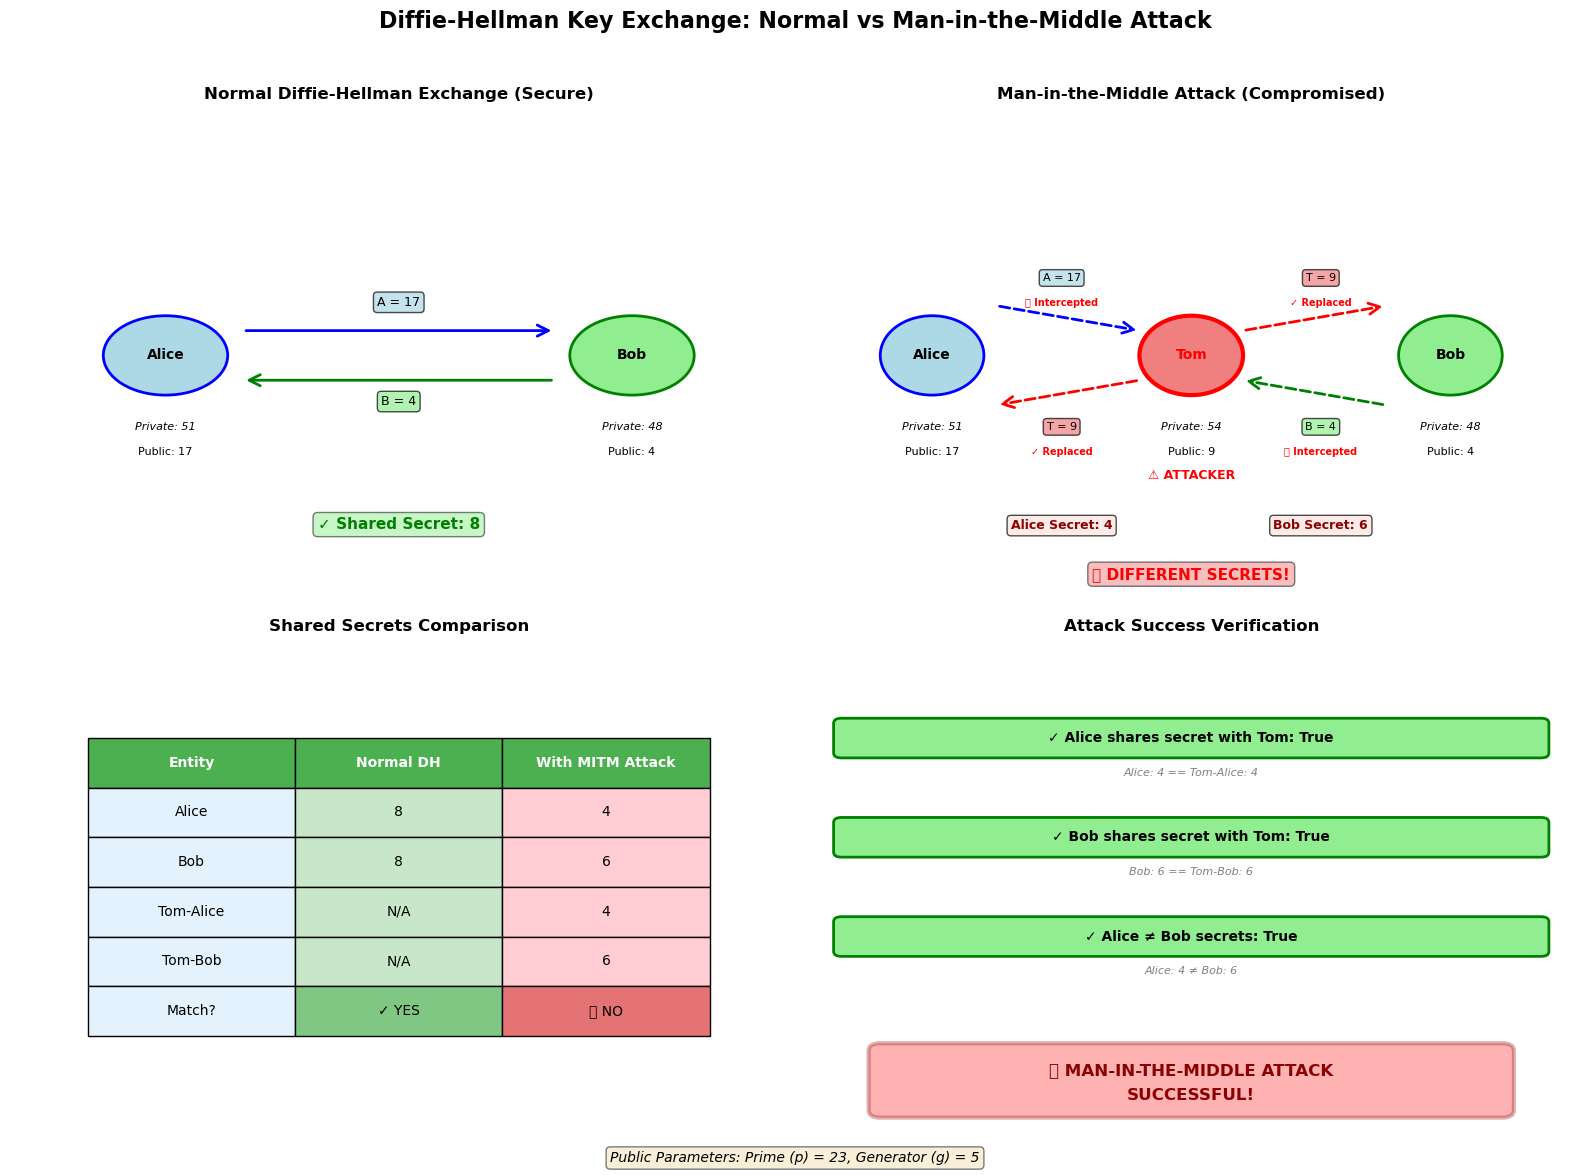

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Circle
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def visualize_diffie_hellman_mitm_attack(
    alice_private, alice_public, bob_private, bob_public,
    tom_private, tom_public, alice_secret, bob_secret,
    tom_alice_secret, tom_bob_secret, normal_secret, prime, generator
):
    """
    Create a comprehensive visualization of the Diffie-Hellman MITM attack
    """
    
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(16, 12))
    fig.suptitle('Diffie-Hellman Key Exchange: Normal vs Man-in-the-Middle Attack', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    # ========== SUBPLOT 1: Normal Diffie-Hellman ==========
    ax1 = plt.subplot(2, 2, 1)
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 10)
    ax1.axis('off')
    ax1.set_title('Normal Diffie-Hellman Exchange (Secure)', fontsize=12, fontweight='bold')
    
    # Draw Alice
    alice_circle = Circle((2, 5), 0.8, color='lightblue', ec='blue', linewidth=2)
    ax1.add_patch(alice_circle)
    ax1.text(2, 5, 'Alice', ha='center', va='center', fontweight='bold', fontsize=10)
    ax1.text(2, 3.5, f'Private: {alice_private}', ha='center', fontsize=8, style='italic')
    ax1.text(2, 3, f'Public: {alice_public}', ha='center', fontsize=8)
    
    # Draw Bob
    bob_circle = Circle((8, 5), 0.8, color='lightgreen', ec='green', linewidth=2)
    ax1.add_patch(bob_circle)
    ax1.text(8, 5, 'Bob', ha='center', va='center', fontweight='bold', fontsize=10)
    ax1.text(8, 3.5, f'Private: {bob_private}', ha='center', fontsize=8, style='italic')
    ax1.text(8, 3, f'Public: {bob_public}', ha='center', fontsize=8)
    
    # Draw arrows for key exchange
    arrow1 = FancyArrowPatch((3, 5.5), (7, 5.5), arrowstyle='->', 
                            mutation_scale=20, linewidth=2, color='blue')
    ax1.add_patch(arrow1)
    ax1.text(5, 6, f'A = {alice_public}', ha='center', fontsize=9, 
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    
    arrow2 = FancyArrowPatch((7, 4.5), (3, 4.5), arrowstyle='->', 
                            mutation_scale=20, linewidth=2, color='green')
    ax1.add_patch(arrow2)
    ax1.text(5, 4, f'B = {bob_public}', ha='center', fontsize=9,
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    
    # Show shared secret
    ax1.text(5, 1.5, f'✓ Shared Secret: {normal_secret}', ha='center', fontsize=11,
             fontweight='bold', color='green',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
    
    # ========== SUBPLOT 2: MITM Attack Diagram ==========
    ax2 = plt.subplot(2, 2, 2)
    ax2.set_xlim(0, 12)
    ax2.set_ylim(0, 10)
    ax2.axis('off')
    ax2.set_title('Man-in-the-Middle Attack (Compromised)', fontsize=12, fontweight='bold')
    
    # Draw Alice
    alice_circle2 = Circle((2, 5), 0.8, color='lightblue', ec='blue', linewidth=2)
    ax2.add_patch(alice_circle2)
    ax2.text(2, 5, 'Alice', ha='center', va='center', fontweight='bold', fontsize=10)
    ax2.text(2, 3.5, f'Private: {alice_private}', ha='center', fontsize=8, style='italic')
    ax2.text(2, 3, f'Public: {alice_public}', ha='center', fontsize=8)
    
    # Draw Tom (Attacker) in the middle
    tom_circle = Circle((6, 5), 0.8, color='lightcoral', ec='red', linewidth=3)
    ax2.add_patch(tom_circle)
    ax2.text(6, 5, 'Tom', ha='center', va='center', fontweight='bold', fontsize=10, color='red')
    ax2.text(6, 3.5, f'Private: {tom_private}', ha='center', fontsize=8, style='italic')
    ax2.text(6, 3, f'Public: {tom_public}', ha='center', fontsize=8)
    ax2.text(6, 2.5, '⚠️ ATTACKER', ha='center', fontsize=9, fontweight='bold', color='red')
    
    # Draw Bob
    bob_circle2 = Circle((10, 5), 0.8, color='lightgreen', ec='green', linewidth=2)
    ax2.add_patch(bob_circle2)
    ax2.text(10, 5, 'Bob', ha='center', va='center', fontweight='bold', fontsize=10)
    ax2.text(10, 3.5, f'Private: {bob_private}', ha='center', fontsize=8, style='italic')
    ax2.text(10, 3, f'Public: {bob_public}', ha='center', fontsize=8)
    
    # Draw intercepted arrows
    # Alice to Tom (Alice thinks it's going to Bob)
    arrow3 = FancyArrowPatch((3, 6), (5.2, 5.5), arrowstyle='->', 
                            mutation_scale=20, linewidth=2, color='blue', linestyle='--')
    ax2.add_patch(arrow3)
    ax2.text(4, 6.5, f'A = {alice_public}', ha='center', fontsize=8,
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    ax2.text(4, 6, '❌ Intercepted', ha='center', fontsize=7, color='red', fontweight='bold')
    
    # Tom to Bob (Bob thinks it's from Alice)
    arrow4 = FancyArrowPatch((6.8, 5.5), (9, 6), arrowstyle='->', 
                            mutation_scale=20, linewidth=2, color='red', linestyle='--')
    ax2.add_patch(arrow4)
    ax2.text(8, 6.5, f'T = {tom_public}', ha='center', fontsize=8,
             bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))
    ax2.text(8, 6, '✓ Replaced', ha='center', fontsize=7, color='red', fontweight='bold')
    
    # Bob to Tom (Bob thinks it's going to Alice)
    arrow5 = FancyArrowPatch((9, 4), (6.8, 4.5), arrowstyle='->', 
                            mutation_scale=20, linewidth=2, color='green', linestyle='--')
    ax2.add_patch(arrow5)
    ax2.text(8, 3.5, f'B = {bob_public}', ha='center', fontsize=8,
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    ax2.text(8, 3, '❌ Intercepted', ha='center', fontsize=7, color='red', fontweight='bold')
    
    # Tom to Alice (Alice thinks it's from Bob)
    arrow6 = FancyArrowPatch((5.2, 4.5), (3, 4), arrowstyle='->', 
                            mutation_scale=20, linewidth=2, color='red', linestyle='--')
    ax2.add_patch(arrow6)
    ax2.text(4, 3.5, f'T = {tom_public}', ha='center', fontsize=8,
             bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))
    ax2.text(4, 3, '✓ Replaced', ha='center', fontsize=7, color='red', fontweight='bold')
    
    # Show compromised secrets
    ax2.text(4, 1.5, f'Alice Secret: {alice_secret}', ha='center', fontsize=9,
             fontweight='bold', color='darkred',
             bbox=dict(boxstyle='round', facecolor='mistyrose', alpha=0.7))
    ax2.text(8, 1.5, f'Bob Secret: {bob_secret}', ha='center', fontsize=9,
             fontweight='bold', color='darkred',
             bbox=dict(boxstyle='round', facecolor='mistyrose', alpha=0.7))
    ax2.text(6, 0.5, '❌ DIFFERENT SECRETS!', ha='center', fontsize=11,
             fontweight='bold', color='red',
             bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))
    
    # ========== SUBPLOT 3: Secret Keys Comparison ==========
    ax3 = plt.subplot(2, 2, 3)
    ax3.axis('off')
    ax3.set_title('Shared Secrets Comparison', fontsize=12, fontweight='bold')
    
    # Create table data
    table_data = [
        ['Entity', 'Normal DH', 'With MITM Attack'],
        ['Alice', f'{normal_secret}', f'{alice_secret}'],
        ['Bob', f'{normal_secret}', f'{bob_secret}'],
        ['Tom-Alice', 'N/A', f'{tom_alice_secret}'],
        ['Tom-Bob', 'N/A', f'{tom_bob_secret}'],
        ['Match?', '✓ YES', '❌ NO']
    ]
    
    table = ax3.table(cellText=table_data, cellLoc='center', loc='center',
                      colWidths=[0.25, 0.25, 0.25],
                      bbox=[0.1, 0.2, 0.8, 0.6])
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    
    # Color the header row
    for i in range(3):
        table[(0, i)].set_facecolor('#4CAF50')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # Color the data rows
    for i in range(1, 6):
        table[(i, 0)].set_facecolor('#E3F2FD')
        table[(i, 1)].set_facecolor('#C8E6C9')
        table[(i, 2)].set_facecolor('#FFCDD2')
    
    # Highlight the "Match?" row
    table[(5, 1)].set_facecolor('#81C784')
    table[(5, 2)].set_facecolor('#E57373')
    
    # ========== SUBPLOT 4: Attack Flow Diagram ==========
    ax4 = plt.subplot(2, 2, 4)
    ax4.set_xlim(0, 10)
    ax4.set_ylim(0, 10)
    ax4.axis('off')
    ax4.set_title('Attack Success Verification', fontsize=12, fontweight='bold')
    
    # Verification checks
    y_pos = 8
    checks = [
        (f'✓ Alice shares secret with Tom: {alice_secret == tom_alice_secret}', 
         f'Alice: {alice_secret} == Tom-Alice: {tom_alice_secret}'),
        (f'✓ Bob shares secret with Tom: {bob_secret == tom_bob_secret}',
         f'Bob: {bob_secret} == Tom-Bob: {tom_bob_secret}'),
        (f'✓ Alice ≠ Bob secrets: {alice_secret != bob_secret}',
         f'Alice: {alice_secret} ≠ Bob: {bob_secret}')
    ]
    
    for check, detail in checks:
        # Main check
        box = FancyBboxPatch((0.5, y_pos-0.3), 9, 0.6, 
                            boxstyle="round,pad=0.1", 
                            facecolor='lightgreen' if '✓' in check else 'lightcoral',
                            edgecolor='green' if '✓' in check else 'red',
                            linewidth=2)
        ax4.add_patch(box)
        ax4.text(5, y_pos, check, ha='center', va='center', 
                fontsize=10, fontweight='bold')
        
        # Detail
        ax4.text(5, y_pos-0.7, detail, ha='center', va='center',
                fontsize=8, style='italic', color='gray')
        
        y_pos -= 2
    
    # Final verdict
    verdict_box = FancyBboxPatch((1, 0.5), 8, 1.2,
                                boxstyle="round,pad=0.15",
                                facecolor='red', alpha=0.3,
                                edgecolor='darkred', linewidth=3)
    ax4.add_patch(verdict_box)
    ax4.text(5, 1.3, '🚨 MAN-IN-THE-MIDDLE ATTACK', ha='center', va='center',
            fontsize=12, fontweight='bold', color='darkred')
    ax4.text(5, 0.8, 'SUCCESSFUL!', ha='center', va='center',
            fontsize=12, fontweight='bold', color='darkred')
    
    # Add public parameters info at the bottom
    fig.text(0.5, 0.02, f'Public Parameters: Prime (p) = {prime}, Generator (g) = {generator}',
            ha='center', fontsize=10, style='italic',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.show()


# Example usage with your data
visualize_diffie_hellman_mitm_attack(
    alice_private=alice_private_key,
    alice_public=alice_public_key,
    bob_private=bob_private_key,
    bob_public=bob_public_key,
    tom_private=tom_private_key,
    tom_public=tom_public_key,
    alice_secret=alice_shared_secret,
    bob_secret=bob_shared_secret,
    tom_alice_secret=tom_alice_shared_secret,
    tom_bob_secret=tom_bob_shared_secret,
    normal_secret=alice_normal_secret,
    prime=PRIME,
    generator=GENERATOR
)